# Trung bình nhân (G-Mean), Dominance, Chỉ số của độ chính xác không cân bằng (IBA)

- **G-Mean** = sqrt( tp / (tp = fn) * tn / (tn + fp) ) = sqrt ( recall x True Negative Rate)

- **Dominance** = True Positive Rate - True Negative Rate

- **IBA** = M * (1 + alpha * Dominance)

- **TPR** = **Recall** = tp / (tp + fn)

- **TNR** = tn / (tn + fp)


Tất cả các phép đo trên phụ thuộc vào ngưỡng biệt số được dùng để phân loại một quan sát thuộc lớp positive hay lớp thiếu số.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    recall_score,
    accuracy_score,
    balanced_accuracy_score,
)

from imblearn.metrics import (
    geometric_mean_score,
    make_index_balanced_accuracy,
)

## Load dữ liệu

In [3]:
# load dữ liệu
data = pd.read_csv('kdd2004.csv')

# ánh xạ lại phân lớp mục tiêu thành 0 và 1
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


<details><summary> Gợi ý </summary>

[map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

</details>

In [4]:
# kích thước dữ liệu

data.shape

(145751, 75)

In [5]:
# mục tiêu không cân bằng

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [7]:
# tách thành tập huấn luyện và tập kiểm tra
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

<details><summary> Gợi ý </summary>

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

</details>

## Baseline: dự đoán lớp đa số

In [8]:
# Dự đoán cơ sở: dự đoán lớp đa số
## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

<details><summary> Gợi ý </summary>

[zeros()](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)

</details>

## Huấn luyện mô hình học máy

### Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

<details><summary> Gợi ý </summary>

[predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba)

</details>

### Hồi quy Logistic

In [10]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<details><summary> Gợi ý </summary>

Sử dụng ```predict_proba()```

</details>

## Recall

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

- **TPR** = **Recall** = tp / (tp + fn)

In [11]:
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.7135802469135802


<details><summary> Gợi ý </summary>

Sử dụng ```recall_score()```

</details>

## True Negative Rate

Tương đương với Recall nhưng là cho lớp đa số.

- **TNR** = tn / (tn + fp)

In [12]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
print('TNR Baseline test: ', recall_score(y_test, y_test_base, pos_label=0))
print('TNR Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=0))
print('TNR Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=0))

TNR Baseline test:  1.0
TNR Random Forest test: 0.9999769165070058
TNR Logistic Regression test: 0.9996306641120934


<details><summary> Gợi ý </summary>

Sử dụng ```recall_score()```

</details>

## Trung bình nhân

https://imbalanced-learn.org/stable/generated/imblearn.metrics.geometric_mean_score.html

- **G-Mean** = sqrt( tp / (tp = fn) * tn / (tn + fp) ) = sqrt ( recall x True Negative Rate)

In [15]:
## Yêu cầu 8:
## VIẾT CODE Ở ĐÂY:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8445807812870796


<details><summary> Gợi ý </summary>

Sử dụng ```geometric_mean_score()```

</details>

## Dominance

- **Dominance** = True Positive Rate - True Negative Rate

In [16]:
def dominance(y_true, y_pred):
    tpr = recall_score(y_test, y_pred, pos_label=1)
    tnr = recall_score(y_test, y_pred, pos_label=0)
    ## Yêu cầu 9:
    ## VIẾT CODE Ở ĐÂY:
    return tpr - tnr

In [17]:
## Yêu cầu 10:
## VIẾT CODE Ở ĐÂY:
print('Dominance Baseline test: ', dominance(y_test, y_test_base))
print('Dominance Random Forest test:', dominance(y_test, rf.predict(X_test)))
print('Dominance Logistic Regression test:', dominance(y_test, logit.predict(X_test)))

Dominance Baseline test:  -1.0
Dominance Random Forest test: -0.39750778070453663
Dominance Logistic Regression test: -0.2860504171985132


<details><summary> Gợi ý </summary>

Sử dụng ```dominance()```

</details>

## Các phép đo với ngưỡng

Text(0.5, 1.0, 'Metrics vs Discriminant Threshold')

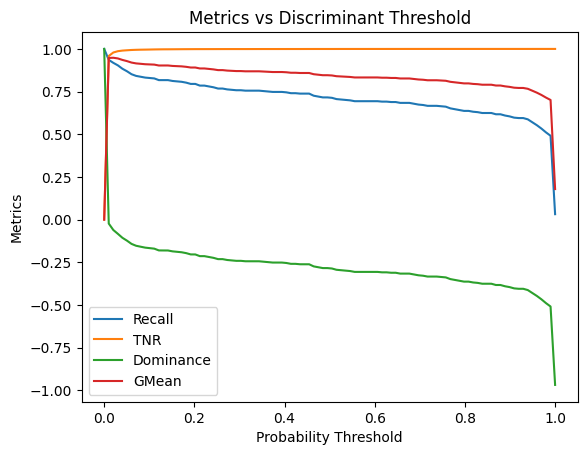

In [18]:
# danh sách các ngưỡng
thresholds = np.linspace(0, 1, 100)

# danh sách các giá trị thu thập
recall_ls = []
tnr_ls = []
dominance_ls = []
gmean_ls = []

# lấy các xác suất
probs_logit = logit.predict_proba(X_test)[:, 1]

# tính G-Mean căn cứ theo ngưỡng
for threshold in thresholds:

    # lấy dự đoán phân lớp căn cứ theo ngưỡng
    ## Yêu cầu 11:
    ## VIẾT CODE Ở ĐÂY:
    preds_logit = np.where(probs_logit >= threshold, 1, 0)

    # lấy các phép đo theo thứ tự sau: 'Recall', 'TNR', 'Dominance', 'GMean'
    recall_ls.append(recall_score(y_test, preds_logit, pos_label=1))
    tnr_ls.append((recall_score(y_test, preds_logit, pos_label=0)))
    dominance_ls.append(dominance(y_test, preds_logit))
    gmean_ls.append(geometric_mean_score(y_test, preds_logit))


# sau vòng lặp nối các phép đo
metrics = pd.concat([
    pd.Series(recall_ls),
    pd.Series(tnr_ls),
    pd.Series(dominance_ls),
    pd.Series(gmean_ls)], axis=1)

# thêm tên cột và ngưỡng vào chỉ số
metrics.columns = ['Recall', 'TNR', 'Dominance', 'GMean']
metrics.index = thresholds

# vẽ biểu đồ
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs Discriminant Threshold')

## Chỉ số của độ chính xác không cân bằng


### Trung bình nhân

In [15]:
## Yêu cầu 12:
## VIẾT CODE Ở ĐÂY:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, ...))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(...)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(...)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8431183026464842


<details><summary> Gợi ý </summary>

Sử dụng ```geometric_mean_score()```

</details>

In [20]:
## Yêu cầu 13:
## VIẾT CODE Ở ĐÂY:
gmean = make_index_balanced_accuracy(alpha=0.5, squared=True)(geometric_mean_score)

print('Corrected G-Mean Baseline test: ', gmean(y_test, y_test_base))
print('Corrected G-Mean Random Forest test:', gmean(y_test, rf.predict(X_test)))
print('Corrected G-Mean Logistic Regression test:', gmean(y_test, logit.predict(X_test)))

Corrected G-Mean Baseline test:  0.0
Corrected G-Mean Random Forest test: 0.6024552287103938
Corrected G-Mean Logistic Regression test: 0.7133166961194938


<details><summary> Gợi ý </summary>

Sử dụng ```make_index_balanced_accuracy()``` và ```gmean```

</details>

### Độ chính xác

In [21]:
## Yêu cầu 14:
## VIẾT CODE Ở ĐÂY:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9969812011160408


<details><summary> Gợi ý </summary>

Sử dụng ```accuracy_score()```

</details>

In [22]:
## Yêu cầu 15:
## VIẾT CODE Ở ĐÂY:
acc = make_index_balanced_accuracy(alpha=0.5, squared=True)(accuracy_score)

print('Corrected Accuracy Baseline test: ', acc(y_test, y_test_base))
print('Corrected Accuracy Random Forest test:', acc(y_test, rf.predict(X_test)))
print('Corrected Accuracy Logistic Regression test:', acc(y_test, logit.predict(X_test)))

Corrected Accuracy Baseline test:  0.4907806705467988
Corrected Accuracy Random Forest test: 0.7953200510570445
Corrected Accuracy Logistic Regression test: 0.8518085320500137


<details><summary> Gợi ý </summary>

Sử dụng ```make_index_balanced_accuracy()``` và ```acc```

</details>

# ROC-AUC

In [31]:
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC

## ROC-AUC

In [26]:
## Yêu cầu 16:
## VIẾT CODE Ở ĐÂY:
print('ROC-AUC Baseline test: ', roc_auc_score(y_test, y_test_base))
print('ROC-AUC Random Forest test:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('ROC-AUC Logistic Regression test:', roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

ROC-AUC Baseline test:  0.5
ROC-AUC Random Forest test: 0.9433902127699593
ROC-AUC Logistic Regression test: 0.9899522969642927


<details><summary> Gợi ý </summary>

Sử dụng ```roc_auc_score()```

</details>

## Vẽ biểu đồ ROC-AUC

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

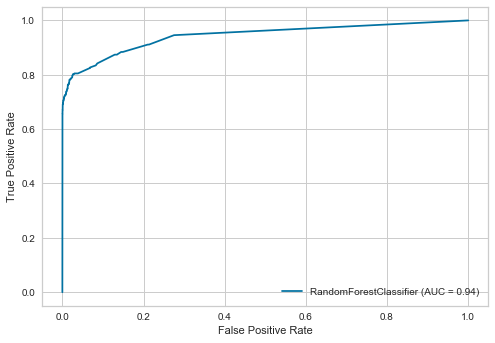

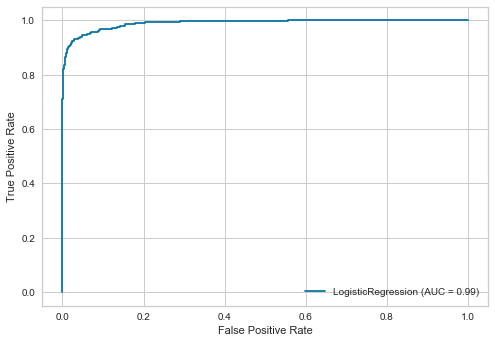

In [21]:
## Yêu cầu 17:
## VIẾT CODE Ở ĐÂY:
rf_disp = plot_roc_curve(rf, X_test, y_test)
logit_disp = plot_roc_curve(logit, X_test, y_test)

<details><summary> Gợi ý </summary>

Sử dụng ```plot_roc_curve()```

</details>

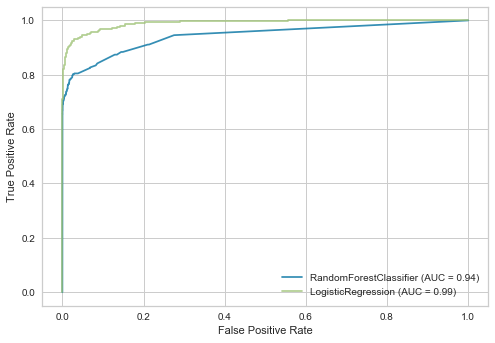

In [22]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

## ROC-AUC với yellowbrick

https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


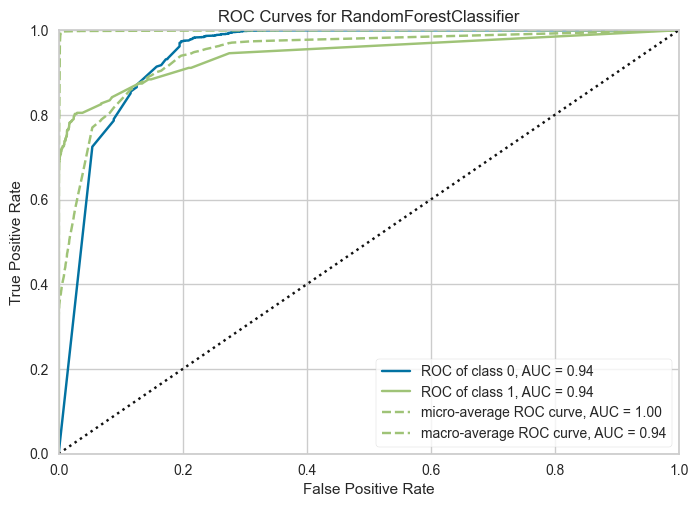

<AxesSubplot: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [32]:
## Yêu cầu 18:
## VIẾT CODE Ở ĐÂY:
visualizer = ROCAUC(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Khớp dữ liệu huấn luyện với visualizer
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show()

<details><summary> Gợi ý </summary>

Sử dụng ```ROCAUC()``` và ```score()```

</details>

c:\users\v\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


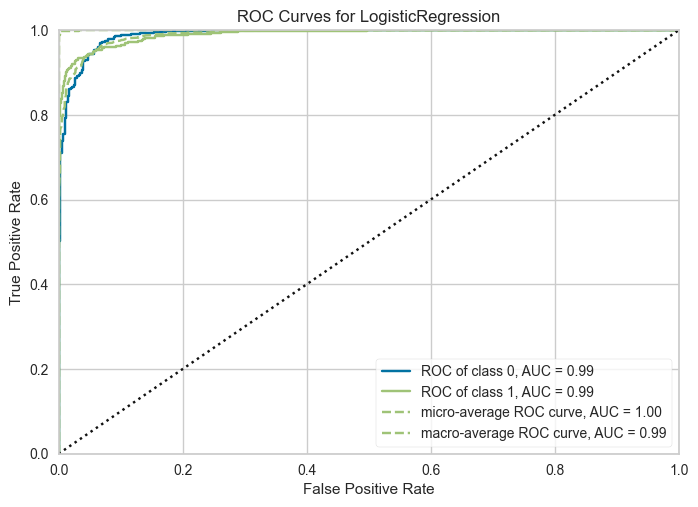

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
## Yêu cầu 19:
## VIẾT CODE Ở ĐÂY:
visualizer = ROCAUC(logit, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Khớp dữ liệu huấn luyện với visualizer
visualizer.score(X_test, y_test)        # Đánh giá mô hình trên dữ liệu kiểm tra
visualizer.show()                       # Hoàn thành và hiển thị kết quả

<details><summary> Gợi ý </summary>

Sử dụng ```ROCAUC()``` và ```score()```

</details>